# Explizite Finite Differenzen mit von Neumann-Randbedingung
Löse die Wärmeleitungsgleichung mit Randbedingungen
$$ u(t, 0) = T_l \qquad\text{(Cauchy)}$$
$$ \frac{\partial u(t, L)}{\partial x} = 0 \qquad\text{(von Neumann)}.$$
Interpretation: Stab, der links auf Temperatur $u_0$ gehalten wird und rechts isoliert ist (kein Wärmefluss).

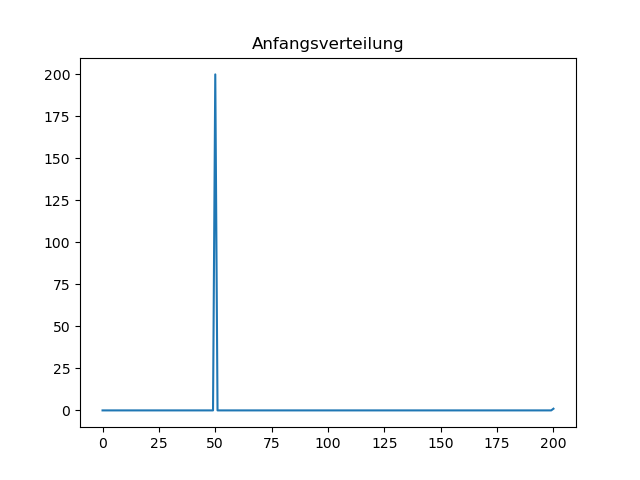

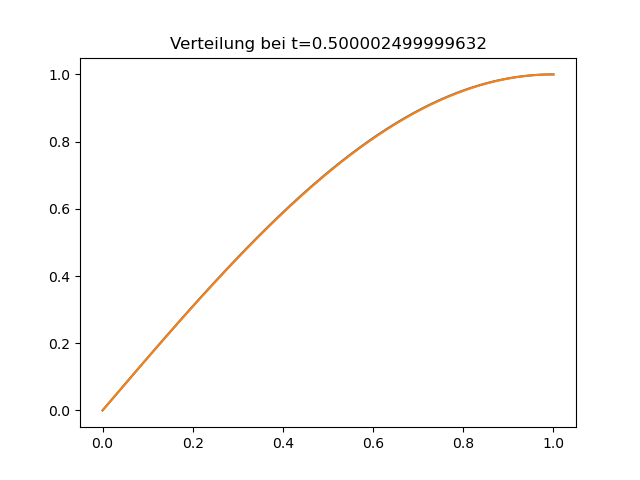

In [15]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

L = 1
D = 1
M = 1

T_l = 0 # linke Randbedingung

N = 200 # Anzahl der räumlichen Intervale
dx = L/N
alpha = 0.3
dt = alpha * dx**2 / D

# Anfangsverteilung
u_0 = np.zeros(N+1)
u_0[int(N/4)] = M/dx
u_0[0] = T_l
u_0[-1] = T_r

t_end = 0.5
t = 0.0
u = u_0.copy()

while t < t_end:
    u[1:N] = (1 - 2*alpha)*u[1:N] + alpha*(u[0:N-1] + u[2:])
    u[-1] = u[-2]
    t += dt

plt.figure(1)
plt.clf()
plt.plot(u_0)
plt.title("Anfangsverteilung")
plt.show();

plt.figure(2)
plt.clf()
xs = np.linspace(0, L, N+1)
#plt.plot(xs, u)
plt.title(f"Verteilung bei {t=}")
plt.plot(xs, u/np.max(u))
plt.plot(xs, np.sin(np.pi * xs/(2*L)))
plt.show();